# Pymaceuticals Inc.
---

### Analysis

- The P-Value of .84 indicates that there is a postitive correlation between the weight of the mice and their tumor size. As the mice's weight increases so do the sizes of their tumors. It may be worth investigating the impact of healthy diet and body mass on tumor outcomes. 

- Capomulin and Ramicane were both effective at decreasing tumor size while Infubinol and Ceftamin were less effective. If further trials are needed I would recomend focusing on Capomulin and Ramicane.

- Capomulin and Ramicane had the most timepoints tested of any of the treatments which likely led to the lower Tumore Volume Variance we see for both of those treatments. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(pd.unique(study_data_complete["Mouse ID"]))
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete[study_data_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_id = pd.unique(duplicate_mice["Mouse ID"])
duplicate_mice_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_all = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mice_id)]
duplicate_mice_all

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_complete[~study_data_complete['Mouse ID'].isin(duplicate_mice_id)]
study_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(pd.unique(study_data_clean["Mouse ID"]))
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_volume = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_volume = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
volume_variance = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
volume_std_dev = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
volume_std_err = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({'Mean Tumor Volume': mean_volume, 'Median Tumor Volume': median_volume,
                              'Tumor Volume Variance': volume_variance, 'Tumor Volume Std. Dev.': volume_std_dev,
                              'Tumor Volume Std. Err.':volume_std_err})

# Display results
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats_agg = study_data_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

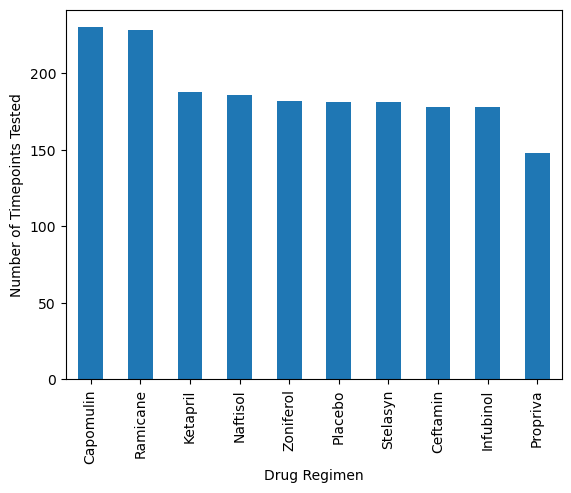

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_count = study_data_clean.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint_sorted = timepoint_count.sort_values(ascending=False)

#Create Chart
timepoint_chart = timepoint_sorted.plot(kind='bar')

# Set the xlabel and ylabel using class methods
timepoint_chart.set_xlabel('Drug Regimen')
timepoint_chart.set_ylabel("Number of Timepoints Tested")

plt.show()
plt.tight_layout()

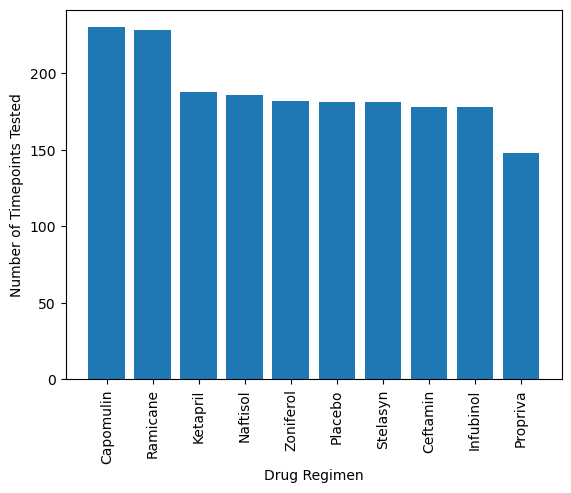

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(timepoint_sorted.index, timepoint_sorted.values)

plt.ylabel('Number of Timepoints Tested', size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical')

plt.show()
plt.tight_layout()

<AxesSubplot:ylabel='Sex'>

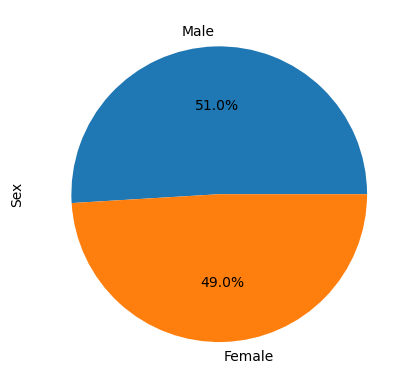

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = study_data_clean.groupby(['Sex'])['Sex'].count()
gender_sorted = gender.sort_values(ascending=False)

gender_sorted.plot.pie(autopct='%1.1f%%')


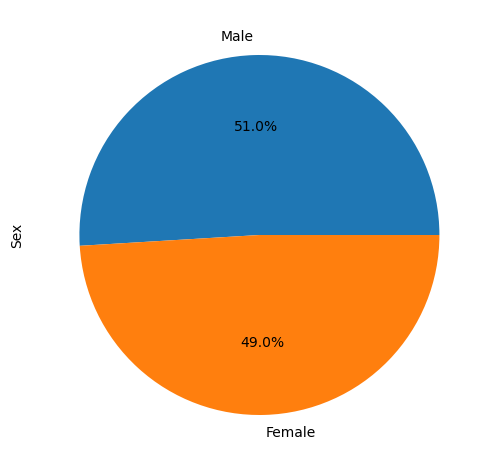

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_sorted, labels=('Male', 'Female'), autopct='%1.1f%%')
plt.ylabel('Sex')

plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = study_data_clean.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_vol = pd.merge(study_data_clean, last_timepoint_df, on = ('Mouse ID', 'Timepoint'), how='right')
last_timepoint_vol

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_timepoint_vol.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        tumor_capomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_ceftamin.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_volume = pd.DataFrame({treatments[0]: tumor_capomulin,
                            treatments[1]: tumor_ramicane,
                            treatments[2]: tumor_infubinol,
                            treatments[3]: tumor_ceftamin
                           })
    
    # Determine outliers using upper and lower bounds
drug_volume_max = drug_volume.max()
drug_volume_min = drug_volume.min()
    

for treatment in treatments:
    quartiles = drug_volume[treatment].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    if drug_volume_min[treatment] < lower_bound:
        print(f"{treatment} has an IQR of {iqr} and outliers below the lower bound of: {lower_bound}")
    if drug_volume_max[treatment] > upper_bound:
        print(f"{treatment} has an IQR of {iqr} and outliers above the upper bound of: {upper_bound}")
    if drug_volume_max[treatment] < upper_bound and drug_volume_min[treatment] > lower_bound:
        print(f"{treatment} has an IQR of {iqr} and no outliers.")


Capomulin has an IQR of 7.78 and no outliers.
Ramicane has an IQR of 9.1 and no outliers.
Infubinol has an IQR of 11.48 and outliers below the lower bound of: 36.83
Ceftamin has an IQR of 15.58 and no outliers.


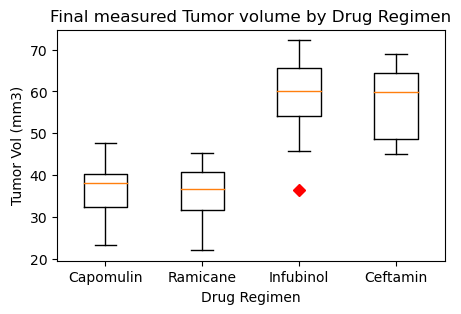

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [drug_volume[treatments[0]],
                drug_volume[treatments[1]],
                drug_volume[treatments[2]],
                drug_volume[treatments[3]]
               ]

# Set figure size, title, and axis lables
fig1, ax = plt.subplots(figsize=(5,3))
ax.set_title('Final measured Tumor volume by Drug Regimen') 
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Vol (mm3)')

# Create the boxplot
ax.boxplot(boxplot_list, 0, 'rD')
plt.xticks([1,2,3,4], treatments)
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

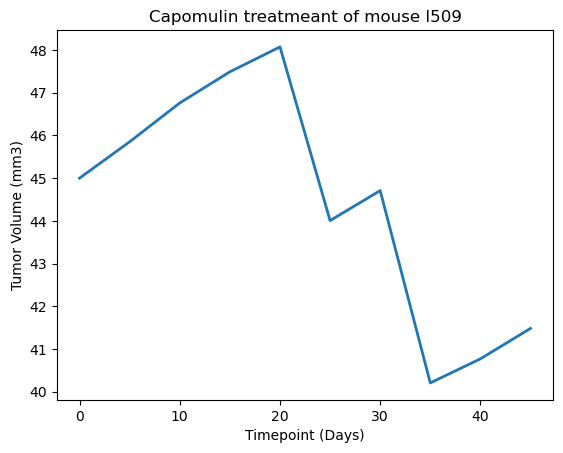

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = study_data_clean.loc[study_data_clean['Mouse ID'] == 'l509',:]

x_axis = line_plot_df['Timepoint'] 
tumor_vol = line_plot_df['Tumor Volume (mm3)'] 

plt.plot(x_axis, tumor_vol, linewidth=2, markersize=12) 

plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

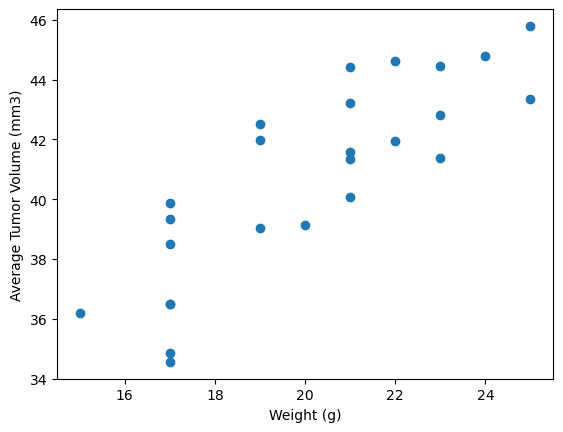

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter_plot_df = study_data_clean.loc[study_data_clean["Drug Regimen"] == "Capomulin",:]
Capomulin_avg = scatter_plot_df.groupby(['Mouse ID']).mean()

plt.scatter(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


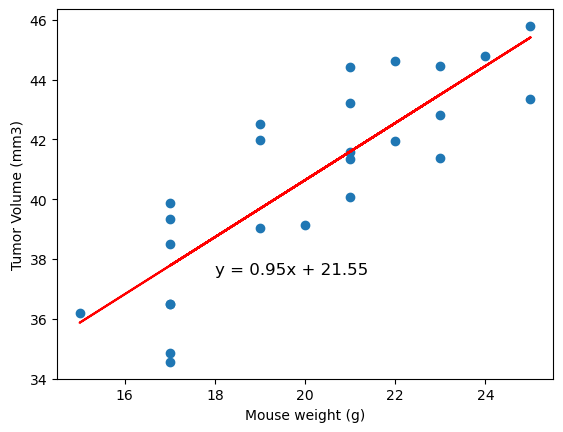

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])[0], 2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

x_values = Capomulin_avg['Weight (g)']
y_values = Capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,37.5),fontsize=12,color="black")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
